In [9]:
import torch
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

[LOG]: Using GPU: Tesla K80


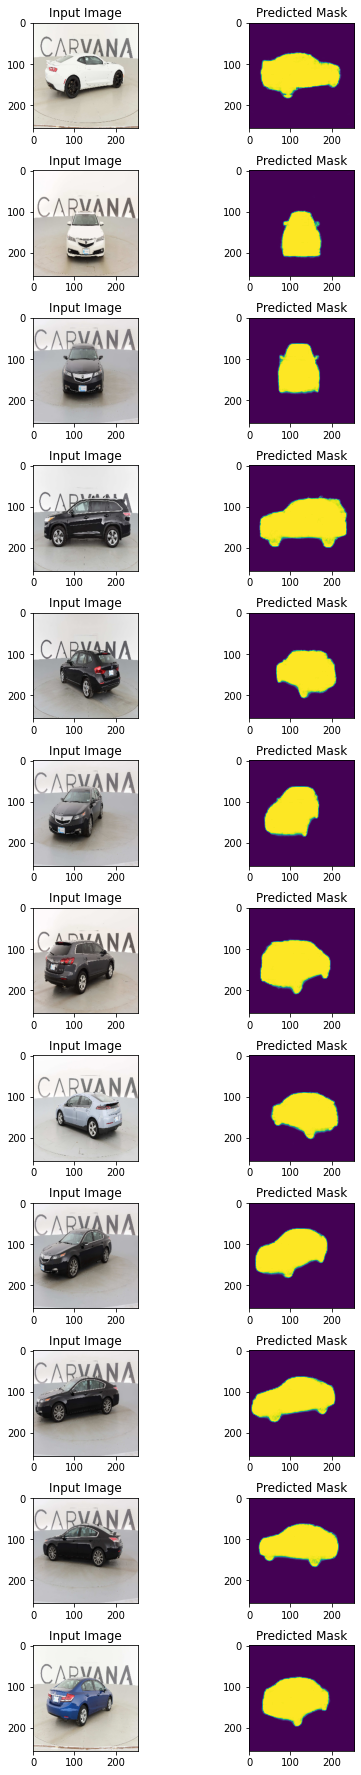

In [43]:
from inference import load_checkpoint,open_img

config = {
        "use_gpu": True,
        "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
        "model": "fcn",
        "resize": 256,
        "use_single_example": False,
        "single_example_path": "",
        "use_dir": True,
        "dir_path": "imgs/",
        "learning_rate": 1e-3
    }

def display_predictions():
    model,_,_,curr_epochs = load_checkpoint(config,config['device'])
    model.eval()
    
    rows = len(os.listdir(config['dir_path']))
    fig, axes = plt.subplots(nrows=rows, ncols=2,figsize=(30,30))
    plt.subplots_adjust(
        left  = 0.0,  # the left side of the subplots of the figure
        right = 0.2,    # the right side of the subplots of the figure
        bottom = 0.1,   # the bottom of the subplots of the figure
        top = 0.9,      # the top of the subplots of the figure
        wspace = 0.0,   # the amount of width reserved for blank space between subplots
        hspace = 0.4   # the amount of height reserved for white space between subplot
    )

    for i,f in enumerate(os.listdir(config['dir_path'])):
        img = open_img(os.path.join(config['dir_path'],f))
        img = TF.resize(img, (config['resize'], config['resize'])).to(config['device'])[None]

        pred_mask = model(img).squeeze(0).squeeze(0)
        pred_mask = torch.sigmoid(pred_mask).detach().cpu().numpy()

        input_im = img.detach().cpu().squeeze(0).permute(1,2,0).float().numpy()

        axes[i][0].set_title("Input Image")
        axes[i][0].imshow((input_im / 255).astype(np.float32))
        axes[i][1].set_title("Predicted Mask")
        axes[i][1].imshow((pred_mask * 255).astype(np.uint8))

display_predictions()

[LOG]: Using GPU: Tesla K80


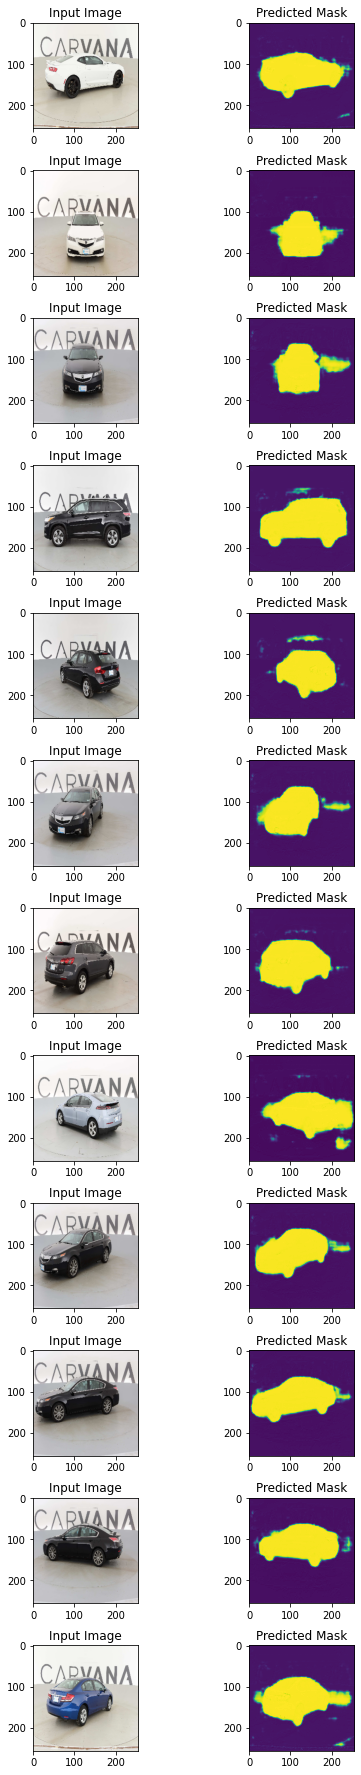

In [44]:
config = {
        "use_gpu": True,
        "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
        "model": "unet",
        "resize": 256,
        "use_single_example": False,
        "single_example_path": "",
        "use_dir": True,
        "dir_path": "imgs/",
        "learning_rate": 1e-3
    }

display_predictions()

In [ ]:
!(python -m inference -m unet --resize 256 \
--use-single-example --single-example-path imgs/000f19f6e7d4_12.jpg \
)